<a href="https://colab.research.google.com/github/claudinez/educ360_DataViz_Vendas_Loja/blob/main/An%C3%A1lise_de_Vendas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
# ==========================
# Análise de Vendas - Loja
# ==========================
# Objetivo:
# 1. Ler o arquivo CSV de vendas.
# 2. Tratar valores nulos de forma lógica.
# 3. Gerar 3 gráficos com matplotlib:
#    - Barras: total de vendas por categoria
#    - Pizza: proporção de vendas por região
#    - Linhas: evolução mensal das vendas
#==========================
```



# **Etapa 1 — Importar bibliotecas e ler o arquivo CSV**

In [9]:
# Passo 1: Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Passo 2: Ler o arquivo CSV da internet
df =  pd.read_csv("https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/vendas_loja.csv")

In [ ]:
# Exibir as 5 primeiras linhas
#mostra o inicio
display(df.head())
#mostra o final
#display(df.tail())

# **Etapa 2 — Analisar e tratar valores nulos / inconsistent**es

In [ ]:
# Verificar informações gerais
df.info()

In [ ]:
# Verificar se há valores nulos
display("\nValores nulos por coluna:")
display(df.isnull().sum())

In [ ]:
# Explicação:
# Isso ajuda a identificar colunas com valores ausentes e possíveis erros numéricos (ex: vendas negativas ou fora do padrão).
# Verificar estatísticas básicas (para entender possíveis inconsistências)
df.describe()

In [ ]:
#Tratamento dos dados
#Aqui decidiremos como tratar valores nulos.
#Vamos:
#Preencher Vendas nulas com a média.
#Preencher Categoria e Região nulas com "Não informado".
#Converter datas corretamente.
# Corrigir tipos de dados
#display(df.columns)
# Substituir valores nulos logicamente
df['Vendas'] = df['Vendas'].fillna(df['Vendas'].mean())        # Substitui valores vazios por média
df['Categoria'] = df['Categoria'].fillna('Não informado')      # Preenche texto vazio
df['Regiao'] = df['Regiao'].fillna('Não informado')

# Confirmar se ainda há nulos
display("\nApós tratamento:")
display(df.isnull().sum())

# **Gráfico 1 — Barras (total de vendas por categoria)**

In [ ]:
vendas_categoria = df.groupby('Categoria')['Vendas'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(vendas_categoria.index, vendas_categoria.values, color='royalblue')
plt.title('💰 Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# **Gráfico 2 — Pizza (proporção por região)**

In [ ]:
vendas_regiao = df.groupby('Regiao')['Vendas'].sum()

plt.figure(figsize=(7,7))
plt.pie(vendas_regiao, labels=vendas_regiao.index, autopct='%1.1f%%', startangle=90)
plt.title('📍 Proporção de Vendas por Região')
plt.show()

# **Gráfico 3 — Linhas (evolução ao longo dos meses)**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


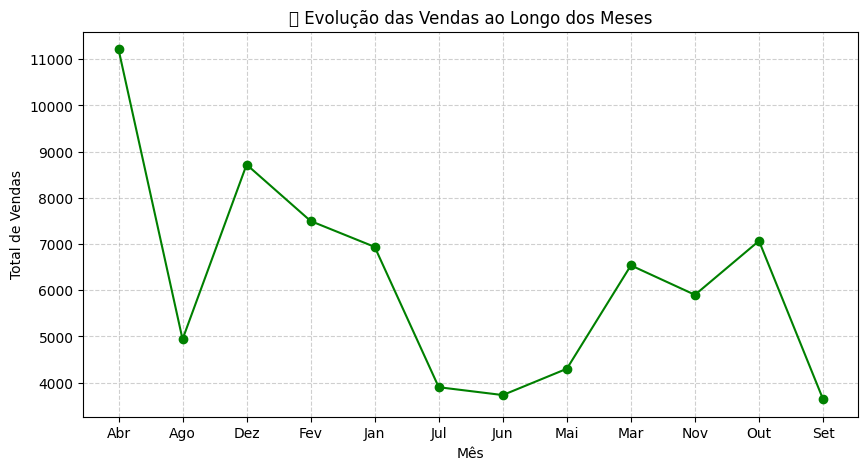

In [27]:
vendas_mes = df.groupby('Mes')['Vendas'].sum()

plt.figure(figsize=(10,5))
plt.plot(vendas_mes.index, vendas_mes.values, marker='o', color='green')
plt.title('📅 Evolução das Vendas ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **Tirando o não informado**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


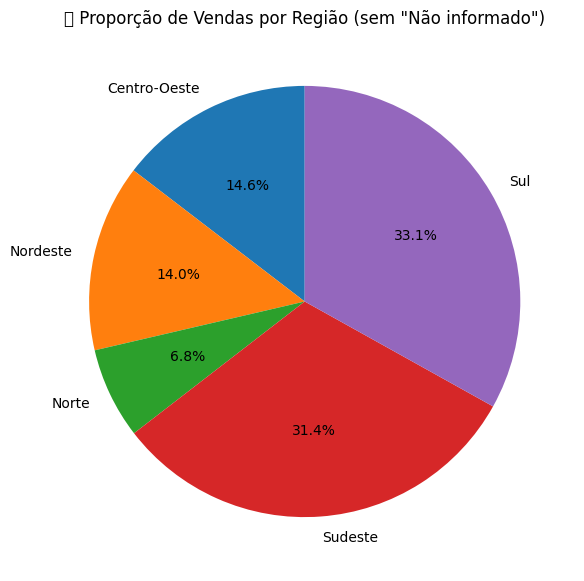

In [28]:
# Filtrar linhas onde a região não é 'Não informado'
df_filtrado = df.loc[df['Regiao'] != 'Não informado']

# Agrupar e somar as vendas por região (sem o 'Não informado')
vendas_regiao = df_filtrado.groupby('Regiao')['Vendas'].sum()

# Gerar o gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(vendas_regiao, labels=vendas_regiao.index, autopct='%1.1f%%', startangle=90)
plt.title('📍 Proporção de Vendas por Região (sem "Não informado")')
plt.show()

In [2]:
df.groupby('curso')['nota'].plot(
     kind='line',
     legend=True,
     figsize=(8,5),
     title=("Frequencia das nortas por curso"),
     xlabel="Curso",
     ylabel="Notas"
)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined